  # Project 1: Trading with Momentum
  ## Instructions
  Each problem consists of a function to implement and instructions on how to implement the function.  The parts of the function that need to be implemented are marked with a `# TODO` comment. After implementing the function, run the cell to test it against the unit tests we've provided. For each problem, we provide one or more unit tests from our `project_tests` package. These unit tests won't tell you if your answer is correct, but will warn you of any major errors. Your code will be checked for the correct solution when you submit it to Udacity.

  ## Packages
  When you implement the functions, you'll only need to you use the packages you've used in the classroom, like [Pandas](https://pandas.pydata.org/) and [Numpy](http://www.numpy.org/). These packages will be imported for you. We recommend you don't add any import statements, otherwise the grader might not be able to run your code.

  The other packages that we're importing are `helper`, `project_helper`, and `project_tests`. These are custom packages built to help you solve the problems.  The `helper` and `project_helper` module contains utility functions and graph functions. The `project_tests` contains the unit tests for all the problems.

  ### Install Packages

In [1]:
import sys

  ### Load Packages

In [2]:
import pandas as pd
import numpy as np
import helper
import project_helper
import project_tests

  ## Market Data
  ### Load Data
  The data we use for most of the projects is end of day data. This contains data for many stocks, but we'll be looking at stocks in the S&P 500. We also made things a little easier to run by narrowing down our range of time period instead of using all of the data.

In [3]:
df = pd.read_csv('eod-quotemedia.csv', parse_dates=['date'], index_col=False)
print(df.head())

        date ticker   adj_close
0 2013-07-01      A 29.99418563
1 2013-07-02      A 29.65013670
2 2013-07-03      A 29.70518453
3 2013-07-05      A 30.43456826
4 2013-07-08      A 30.52402098


In [4]:
close = df.reset_index().pivot(index='date', columns='ticker', values='adj_close')
print('Loaded Data')

Loaded Data


  ### View Data
  Run the cell below to see what the data looks like for `close`.

In [5]:
print(close.head(2))

ticker               A         AAL         AAP        AAPL        ABBV  \
date                                                                     
2013-07-01 29.99418563 16.17609308 81.13821681 53.10917319 34.92447839   
2013-07-02 29.65013670 15.81983388 80.72207258 54.31224742 35.42807578   

ticker             ABC         ABT         ACN        ADBE         ADI  ...  \
date                                                                    ...   
2013-07-01 50.86319750 31.42538772 64.69409505 46.23500000 39.91336014  ...   
2013-07-02 50.69676639 31.27288084 64.71204071 46.03000000 39.86057632  ...   

ticker              XL        XLNX         XOM        XRAY         XRX  \
date                                                                     
2013-07-01 27.66879066 35.28892781 76.32080247 40.02387348 22.10666494   
2013-07-02 27.54228410 35.05903252 76.60816761 39.96552964 22.08273998   

ticker             XYL         YUM         ZBH        ZION         ZTS  
date            

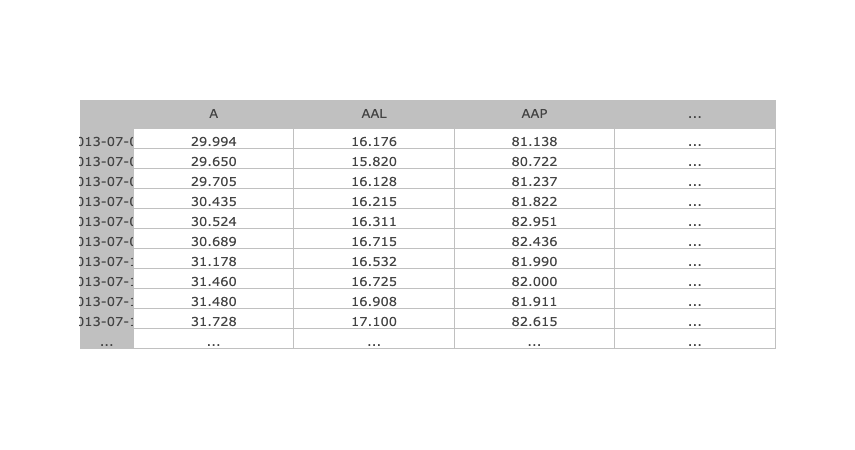

In [6]:
project_helper.print_dataframe(close)

  ### Stock Example
  Let's see what a single stock looks like from the closing prices. For this example and future display examples in this project, we'll use Apple's stock (AAPL). If we tried to graph all the stocks, it would be too much information.

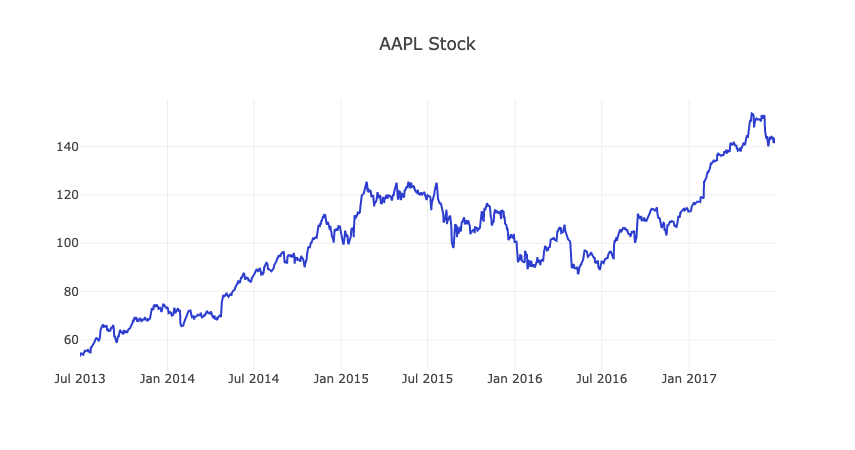

In [7]:
apple_ticker = 'AAPL'
project_helper.plot_stock(close[apple_ticker], '{} Stock'.format(apple_ticker))

  ## Resample Adjusted Prices

  The trading signal you'll develop in this project does not need to be based on daily prices, for instance, you can use month-end prices to perform trading once a month. To do this, you must first resample the daily adjusted closing prices into monthly buckets, and select the last observation of each month.

  Implement the `resample_prices` to resample `close_prices` at the sampling frequency of `freq`.

In [ ]:
def resample_prices(close_prices, freq='M'):
    """
    Resample close prices for each ticker at specified frequency.
    
    Parameters
    ----------
    close_prices : DataFrame
        Close prices for each ticker and date
    freq : str
        What frequency to sample at
        For valid freq choices, see http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
    
    Returns
    -------
    prices_resampled : DataFrame
        Resampled prices for each ticker and date
    """
    return ... 


In [8]:
def resample_prices(close_prices, freq='M'):
    """
    Resample close prices for each ticker at specified frequency.
    
    Parameters
    ----------
    close_prices : DataFrame
        Close prices for each ticker and date
    freq : str
        What frequency to sample at
        For valid freq choices, see http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
    
    Returns
    -------
    prices_resampled : DataFrame
        Resampled prices for each ticker and date
    """
    return close_prices.resample(freq).last()

project_tests.test_resample_prices(resample_prices)

Tests Passed


  ### View Data
  Let's apply this function to `close` and view the results.

In [9]:
monthly_close = resample_prices(close)
print(monthly_close.head(2))

ticker               A         AAL         AAP        AAPL        ABBV  \
date                                                                     
2013-07-31 30.77861719 18.63139292 81.73270857 58.73000866 38.52144972   
2013-08-31 32.09288410 15.55986096 79.33492514 63.64994327 36.09056668   

ticker             ABC         ABT         ACN        ADBE         ADI  ...  \
date                                                                    ...   
2013-07-31 53.87744989 32.99081455 66.22844876 47.28000000 43.44107832  ...   
2013-08-31 53.01732111 30.01866909 64.82868748 45.75000000 41.01373554  ...   

ticker              XL        XLNX         XOM        XRAY         XRX  \
date                                                                     
2013-07-31 28.32843198 41.28388974 79.23671352 41.69639686 23.20721320   
2013-08-31 26.71095532 38.60058125 74.17847651 40.83096325 23.87711213   

ticker             XYL         YUM         ZBH        ZION         ZTS  
date            

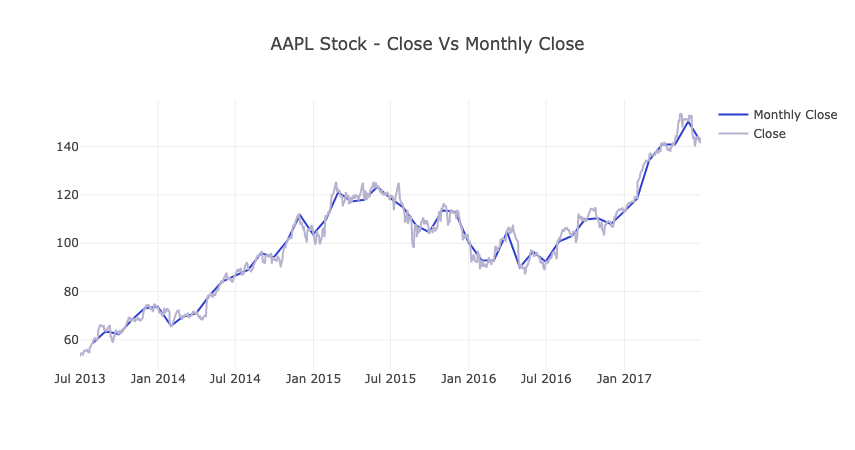

In [10]:
project_helper.plot_resampled_prices(monthly_close.loc[:, apple_ticker],close.loc[:, apple_ticker],'{} Stock - Close Vs Monthly Close'.format(apple_ticker))

  ## Compute Log Returns

  Compute log returns ($R_t$) from prices ($P_t$) as your primary momentum indicator:

  $$R_t = log_e(P_t) - log_e(P_{t-1})$$

  Implement the `compute_log_returns` function below, such that it accepts a dataframe (like one returned by `resample_prices`), and produces a similar dataframe of log returns. Use Numpy's [log function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html) to help you calculate the log returns.

In [ ]:
def compute_log_returns(prices):
    """
    Compute log returns for each ticker.
    
    Parameters
    ----------
    prices : DataFrame
        Prices for each ticker and date
    
    Returns
    -------
    log_returns : DataFrame
        Log returns for each ticker and date
    """
    return ....

In [11]:
def compute_log_returns(prices):
    """
    Compute log returns for each ticker.
    
    Parameters
    ----------
    prices : DataFrame
        Prices for each ticker and date
    
    Returns
    -------
    log_returns : DataFrame
        Log returns for each ticker and date
    """
    return np.log(prices) - np.log(prices.shift())
project_tests.test_compute_log_returns(compute_log_returns)

Tests Passed


In [12]:
# Example of Shift() using "test" prices
# Prices              NQE        ETIW          GCKA         AIL        RSRI
# 2008-08-31  21.05081048 17.01384381   10.98450376 11.24809343 12.96171273
# 2008-09-30 482.34539247 35.20258059 3516.54167823 66.40531433 13.50396048
# 2008-10-31  10.91893302 17.90864387   24.80126542 12.48895419 10.52435923
# Prices (Shift)      NQE        ETIW          GCKA         AIL        RSRI
# 2008-08-31          nan         nan           nan         nan         nan
# 2008-09-30  21.05081048 17.01384381   10.98450376 11.24809343 12.96171273
# 2008-10-31 482.34539247 35.20258059 3516.54167823 66.40531433 13.50396048

  ### View Data
  Using the same data returned from `resample_prices`, we'll generate the log returns.

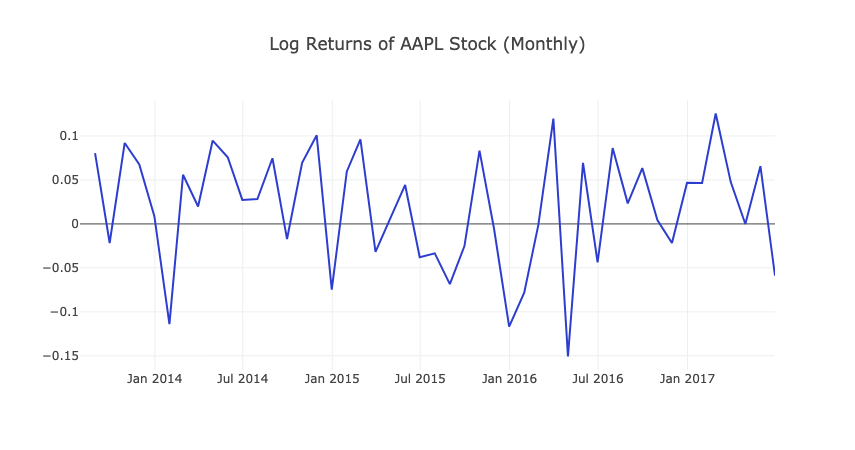

In [13]:
monthly_close_returns = compute_log_returns(monthly_close)
project_helper.plot_returns(
    monthly_close_returns.loc[:, apple_ticker],
    'Log Returns of {} Stock (Monthly)'.format(apple_ticker))

  ## Shift Returns
  Implement the `shift_returns` function to shift the log returns to the previous or future returns in the time series. For example, the parameter `shift_n` is 2 and `returns` is the following:

  ```
                             Returns
                 A         B         C         D
  2013-07-08     0.015     0.082     0.096     0.020     ...
  2013-07-09     0.037     0.095     0.027     0.063     ...
  2013-07-10     0.094     0.001     0.093     0.019     ...
  2013-07-11     0.092     0.057     0.069     0.087     ...
  ...            ...       ...       ...       ...
  ```

  the output of the `shift_returns` function would be:
  ```
                          Shift Returns
                 A         B         C         D
  2013-07-08     NaN       NaN       NaN       NaN       ...
  2013-07-09     NaN       NaN       NaN       NaN       ...
  2013-07-10     0.015     0.082     0.096     0.020     ...
  2013-07-11     0.037     0.095     0.027     0.063     ...
  ...            ...       ...       ...       ...
  ```
  Using the same `returns` data as above, the `shift_returns` function should generate the following with `shift_n` as -2:
  ```
                          Shift Returns
                 A         B         C         D
  2013-07-08     0.094     0.001     0.093     0.019     ...
  2013-07-09     0.092     0.057     0.069     0.087     ...
  ...            ...       ...       ...       ...       ...
  ...            ...       ...       ...       ...       ...
  ...            NaN       NaN       NaN       NaN       ...
  ...            NaN       NaN       NaN       NaN       ...
  ```
  _Note: The "..." represents data points we're not showing._

In [ ]:
def shift_returns(returns, shift_n):
    """
    Generate shifted returns
    
    Parameters
    ----------
    returns : DataFrame
        Returns for each ticker and date
    shift_n : int
        Number of periods to move, can be positive or negative
    
    Returns
    -------
    shifted_returns : DataFrame
        Shifted returns for each ticker and date
    """
    return ...

In [14]:
def shift_returns(returns, shift_n):
    """
    Generate shifted returns
    
    Parameters
    ----------
    returns : DataFrame
        Returns for each ticker and date
    shift_n : int
        Number of periods to move, can be positive or negative
    
    Returns
    -------
    shifted_returns : DataFrame
        Shifted returns for each ticker and date
    """
    return returns.shift(shift_n)
project_tests.test_shift_returns(shift_returns)

Tests Passed


  ### View Data
  Let's get the previous month's and next month's returns.

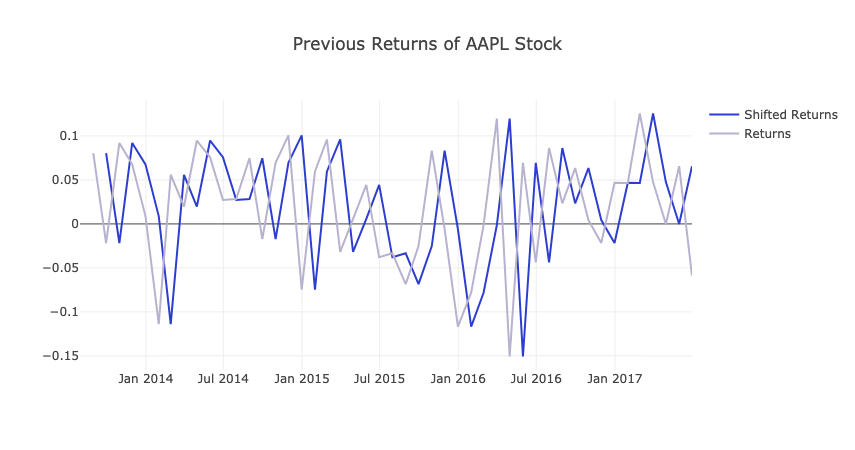

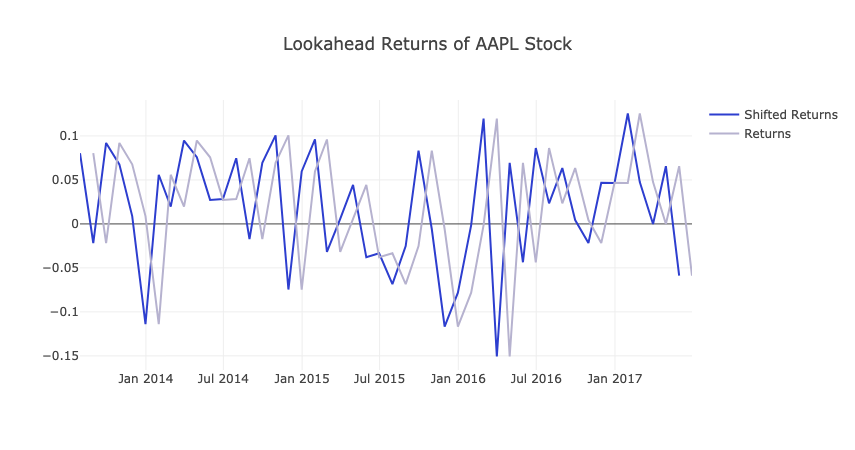

In [15]:
prev_returns = shift_returns(monthly_close_returns, 1)
lookahead_returns = shift_returns(monthly_close_returns, -1)

project_helper.plot_shifted_returns(
    prev_returns.loc[:, apple_ticker],
    monthly_close_returns.loc[:, apple_ticker],
    'Previous Returns of {} Stock'.format(apple_ticker))
project_helper.plot_shifted_returns(
    lookahead_returns.loc[:, apple_ticker],
    monthly_close_returns.loc[:, apple_ticker],
    'Lookahead Returns of {} Stock'.format(apple_ticker))

In [ ]:
''' Visual of Previous and Lookahead Returns'''
print(monthly_close_returns.head())
# 2013-07-31         nan         nan         nan         nan         nan   
# 2013-08-31  0.04181412 -0.18015337 -0.02977582  0.08044762 -0.06518370   
# 2013-09-30  0.09657861  0.15979244  0.03282284 -0.02171531  0.04855545   
# 2013-10-31 -0.00960698  0.14734639  0.18195865  0.09201927  0.08860637   
print(prev_returns.head()) # shifted one month forward
# 2013-07-31         nan         nan         nan         nan         nan   
# 2013-08-31         nan         nan         nan         nan         nan   
# 2013-09-30  0.04181412 -0.18015337 -0.02977582  0.08044762 -0.06518370  
# 2013-10-31  0.09657861  0.15979244  0.03282284 -0.02171531  0.04855545   
print(lookahead_returns.head()) # shifted one month backwards
# 2013-07-31  0.04181412 -0.18015337 -0.02977582  0.08044762 -0.06518370   
# 2013-08-31  0.09657861  0.15979244  0.03282284 -0.02171531  0.04855545   
# 2013-09-30 -0.00960698  0.14734639  0.18195865  0.09201927  0.08860637   
# 2013-10-31  0.05388057  0.06647111  0.01828314  0.06772063  0.00000000   

In [ ]:
def get_top_n(prev_returns, top_n):
    """
    Select the top performing stocks
    
    Parameters
    ----------
    prev_returns : DataFrame
        Previous shifted returns for each ticker and date
    top_n : int
        The number of top performing stocks to get
    
    Returns
    -------
    top_stocks : DataFrame
        Top stocks for each ticker and date marked with a 1
    """
    return ...

In [16]:
def get_top_n(prev_returns, top_n):
    """
    Select the top performing stocks
    
    Parameters
    ----------
    prev_returns : DataFrame
        Previous shifted returns for each ticker and date
    top_n : int
        The number of top performing stocks to get
    
    Returns
    -------
    top_stocks : DataFrame
        Top stocks for each ticker and date marked with a 1
    """
    index = prev_returns.index
    output = (prev_returns.stack().groupby(level=0).rank(ascending=False) <= top_n).unstack()
    output = output.reindex(index).fillna(0).astype(int)
    return output

project_tests.test_get_top_n(get_top_n)

Tests Passed


  ### View Data
  We want to get the best performing and worst performing stocks. To get the best performing stocks,
 we'll use the `get_top_n` function. To get the worst performing stocks, we'll also use the `get_top_n`
 function. However, we pass in `-1*prev_returns` instead of just `prev_returns`. Multiplying by
 negative one will flip all the positive returns to negative and negative returns to positive.
 Thus, it will return the worst performing stocks.

In [17]:
top_bottom_n = 50
df_long = get_top_n(prev_returns, top_bottom_n)
df_short = get_top_n(-1*prev_returns, top_bottom_n) 
project_helper.print_top(df_long, 'Longed Stocks')
project_helper.print_top(df_short, 'Shorted Stocks')

10 Most Longed Stocks:
INCY, AMD, AVGO, NFX, SWKS, NFLX, ILMN, UAL, NVDA, MU
10 Most Shorted Stocks:
RRC, FCX, CHK, MRO, GPS, WYNN, DVN, FTI, SPLS, TRIP


In [18]:
df_long.head(5)

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-07-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-08-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-09-30,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-10-31,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2013-11-30,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [19]:
df_short.head(5)

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-07-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-08-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-09-30,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-10-31,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2013-11-30,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0


  ## Projected Returns
  It's now time to check if your trading signal has the potential to become profitable!

  We'll start by computing the net returns this portfolio would return. For simplicity,
  we'll assume every stock gets an equal dollar amount of investment. This makes it easier
  to compute a portfolio's returns as the simple arithmetic average of the individual stock returns.

  Implement the `portfolio_returns` function to compute the expected portfolio returns.
  Using `df_long` to indicate which stocks to long and `df_short` to indicate which stocks
  to short, calculate the returns using `lookahead_returns`. To help with calculation,
  we've provided you with `n_stocks` as the number of stocks we're investing in a single period.

In [ ]:
'''
Calculate portfolio returns for each month (i.e. 2013-09-30) by multiplying the log returns from 
the subsequent month (i.e. 2013-10-31) by your long/short positions (1,0,-1) derived from the previuos 
month returns (i.e. 2013-08-31) as indicated by df_long & df_short. Because each stock gets an equal
dollar amount of investment, you divide each stock's log returns by the total number invested 
(2 * n_stocks) to get the amount attributed for that individual stock. 
'''

In [ ]:
def portfolio_returns(df_long, df_short, lookahead_returns, n_stocks):
    """
    Compute expected returns for the portfolio, assuming equal investment in each long/short stock.
    
    Parameters
    ----------
    df_long : DataFrame
        Top stocks for each ticker and date marked with a 1
    df_short : DataFrame
        Bottom stocks for each ticker and date marked with a 1
    lookahead_returns : DataFrame
        Lookahead returns for each ticker and date
    n_stocks: int  
        The number number of stocks chosen for each month
    
    Returns
    -------
    portfolio_returns : DataFrame
        Expected portfolio returns for each ticker and date
    """
    portfolio_returns = ...
    return portfolio_returns         

In [20]:
def portfolio_returns(df_long, df_short, lookahead_returns, n_stocks):
    """
    Compute expected returns for the portfolio, assuming equal investment in each long/short stock.
    
    Parameters
    ----------
    df_long : DataFrame
        Top stocks for each ticker and date marked with a 1
    df_short : DataFrame
        Bottom stocks for each ticker and date marked with a 1
    lookahead_returns : DataFrame
        Lookahead returns for each ticker and date
    n_stocks: int  --> becomes 2* top_bottom_n below (cc comment)
        The number number of stocks chosen for each month
    
    Returns
    -------
    portfolio_returns : DataFrame
        Expected portfolio returns for each ticker and date
    """
    test = lookahead_returns*(df_long-df_short)
    portfolio_returns = lookahead_returns*(df_long-df_short)/(n_stocks)
    return portfolio_returns                                                        

project_tests.test_portfolio_returns(portfolio_returns)

Tests Passed


In [ ]:
'''
If going long, then multiply 1 by returns divided by n_stocks (5) b/c each stock gets an equal amount.
If going long, and returns is positive, then making money (1 * 1), if negative, then losing money
If going short, then multiply -1 by returns divided by n_stocks (5) b/c each stock gets an equal amount.
If going short, and returns is negative, then making money (- * -1), if positive, then losing money.
If went long and short on same stock, then cancels out, so zero. 
'''

  ### View Data
  Time to see how the portfolio did.

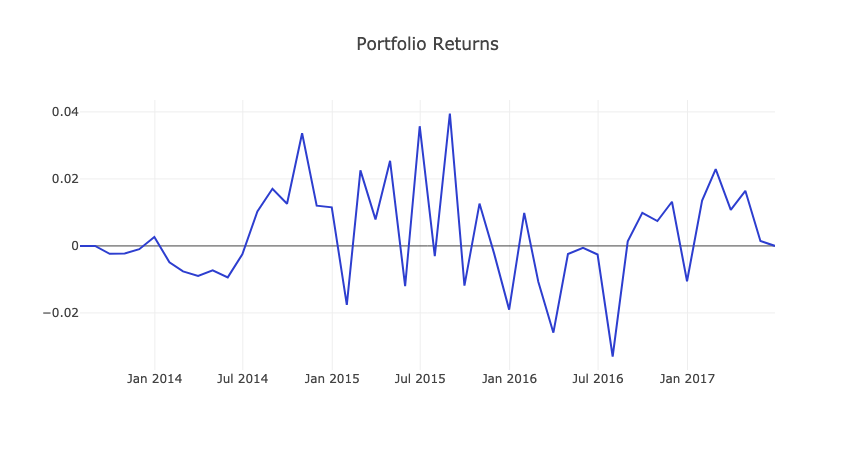

In [21]:
expected_portfolio_returns = portfolio_returns(df_long, df_short, lookahead_returns, 2*top_bottom_n)
project_helper.plot_returns(expected_portfolio_returns.T.sum(), 'Portfolio Returns')

In [22]:
print(expected_portfolio_returns.head(2))

ticker              A         AAL         AAP        AAPL        ABBV  \
date                                                                    
2013-07-31 0.00000000 -0.00000000 -0.00000000  0.00000000 -0.00000000   
2013-08-31 0.00000000  0.00000000  0.00000000 -0.00000000  0.00000000   

ticker             ABC         ABT         ACN        ADBE         ADI  ...  \
date                                                                    ...   
2013-07-31 -0.00000000 -0.00000000 -0.00000000 -0.00000000 -0.00000000  ...   
2013-08-31  0.00000000 -0.00000000  0.00000000  0.00000000  0.00000000  ...   

ticker              XL        XLNX         XOM        XRAY        XRX  \
date                                                                    
2013-07-31 -0.00000000 -0.00000000 -0.00000000 -0.00000000 0.00000000   
2013-08-31  0.00000000  0.00000000 -0.00000000  0.00000000 0.00000000   

ticker             XYL         YUM         ZBH        ZION         ZTS  
date                    

  ## Statistical Tests
  ### Annualized Rate of Return

In [23]:
expected_portfolio_returns_by_date = expected_portfolio_returns.T.sum().dropna()
portfolio_ret_mean = expected_portfolio_returns_by_date.mean()
portfolio_ret_ste = expected_portfolio_returns_by_date.sem()
portfolio_ret_annual_rate = (np.exp(portfolio_ret_mean * 12) - 1) * 100
# np.exp() calculates e^x for each value of x in your input array.
print("""
Mean:                       {:.6f}
Standard Error:             {:.6f}
Annualized Rate of Return:  {:.2f}%
""".format(portfolio_ret_mean, portfolio_ret_ste, portfolio_ret_annual_rate))


Mean:                       0.003185
Standard Error:             0.002158
Annualized Rate of Return:  3.90%



  The annualized rate of return allows you to compare the rate of return from this strategy to other quoted rates of return,
  which are usually quoted on an annual basis.

  ### T-Test
  Our null hypothesis ($H_0$) is that the actual mean return from the signal is zero. We'll perform a one-sample,
  one-sided t-test on the observed mean return, to see if we can reject $H_0$.

  We'll need to first compute the t-statistic, and then find its corresponding p-value. The p-value will indicate
  the probability of observing a t-statistic equally or more extreme than the one we observed if the null hypothesis
  were true. A small p-value means that the chance of observing the t-statistic we observed under the null hypothesis
  is small, and thus casts doubt on the null hypothesis. It's good practice to set a desired level of significance
  or alpha ($\alpha$) _before_ computing the p-value, and then reject the null hypothesis if $p < \alpha$.

  For this project, we'll use $\alpha = 0.05$, since it's a common value to use.

  Implement the `analyze_alpha` function to perform a t-test on the sample of portfolio returns.
  We've imported the `scipy.stats` module for you to perform the t-test.

  Note: [`scipy.stats.ttest_1samp`](https://docs.scipy.org/doc/scipy-1.0.0/reference/generated/scipy.stats.ttest_1samp.html) performs a two-sided test, so divide the p-value by 2 to get 1-sided p-value

In [ ]:
from scipy import stats

def analyze_alpha(expected_portfolio_returns_by_date):
    """
    Perform a t-test with the null hypothesis being that the expected mean return is zero.
    
    Parameters
    ----------
    expected_portfolio_returns_by_date : Pandas Series
        Expected portfolio returns for each date
    
    Returns
    -------
    t_value
        T-statistic from t-test
    p_value
        Corresponding p-value
    """
    t, pv_two_sided = ...
    return ...

project_tests.test_analyze_alpha(analyze_alpha)

In [24]:
from scipy import stats

def analyze_alpha(expected_portfolio_returns_by_date):
    """
    Perform a t-test with the null hypothesis being that the expected mean return is zero.
    
    Parameters
    ----------
    expected_portfolio_returns_by_date : Pandas Series
        Expected portfolio returns for each date
    
    Returns
    -------
    t_value
        T-statistic from t-test
    p_value
        Corresponding p-value
    """
    t, pv_two_sided = stats.ttest_1samp(expected_portfolio_returns_by_date,0)
    return t, pv_two_sided/2

project_tests.test_analyze_alpha(analyze_alpha)

Tests Passed


  ### View Data
  Let's see what values we get with our portfolio. After you run this, make sure to answer the question below.

In [25]:
t_value, p_value = analyze_alpha(expected_portfolio_returns_by_date)
print("""
Alpha analysis:
 t-value:        {:.3f}
 p-value:        {:.6f}
""".format(t_value, p_value))


Alpha analysis:
 t-value:        1.476
 p-value:        0.073339



  ### Question: What p-value did you observe? And what does that indicate about your signal?

  Since the p-value (.074) is greater than α (α=0.05 normally and in this case), this means that the null hypothesis (the actual mean returned from the signal is zero) is not rejected so our result is not statistically significant.

  ## Submission
  Now that you're done with the project, it's time to submit it. Click the submit button in the bottom right. One of our reviewers will give you feedback on your project with a pass or not passed grade. You can continue to the next section while you wait for feedback.